In [106]:
#ML Framework Stuff:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Image Import Commands: 
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

Working with 1239 images
Image example: 
945_resize.jpg


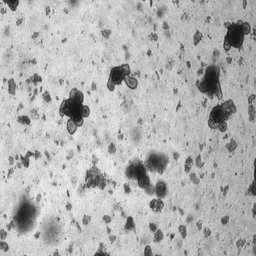

In [24]:
folder = './Images/'

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image example: ")

print(onlyfiles[90])
display(_Imgdis(filename=folder + "/" + onlyfiles[90], width=240, height=320))


In [84]:
train_files=[]
label=[]

for file in onlyfiles:
    img = Image.open(folder + "/" + file).convert('LA')
    test = np.array(list(img.getdata(band=0)), float)
    #newboi = arr.reshape(arr.shape[0]*arr.shape[1]*arr.shape[2],1) 
    train_files.append(test)

print(test.shape)            
print("Files in train_files: %d" % len(train_files))

(65536,)
Files in train_files: 1239


(256, 256)


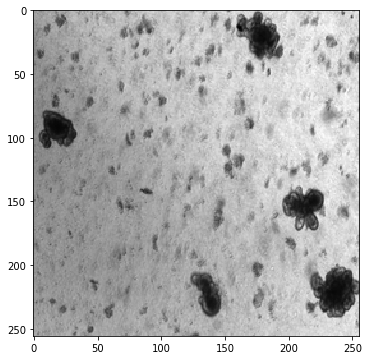

In [89]:
imgmat = np.array(list(img.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (img.size[1], img.size[0])
print(imgmat.shape)

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [91]:
#Time to apply the SVD
U, sigma, VT = np.linalg.svd(imgmat)
print("The shape of U is: " + str(U.shape))
print("The shape of sigma is: " + str(sigma.shape))
print("The shape of VT is: " + str(VT.shape))

The shape of U is: (256, 256)
The shape of sigma is: (256,)
The shape of VT is: (256, 256)


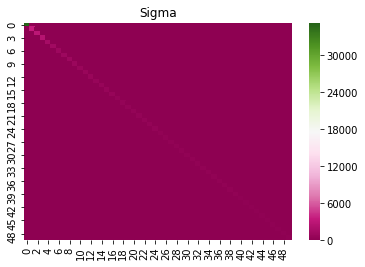

In [118]:
ax = sns.heatmap(np.diag(sigma)[0:50,0:50] ,cmap = "PiYG" )
plt.title("Sigma")
plt.show()

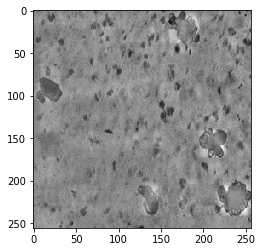

In [105]:
reconstimg = np.matrix(U[:, 4:]) * np.diag(sigma[4:]) * np.matrix(VT[4:, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

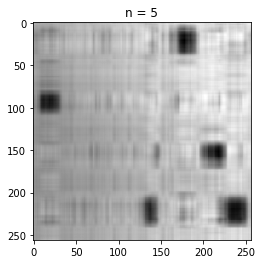

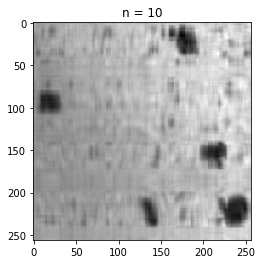

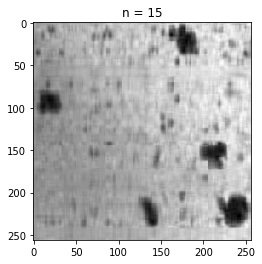

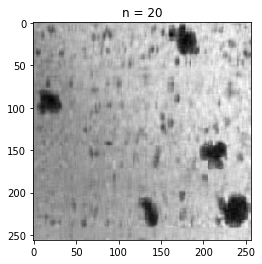

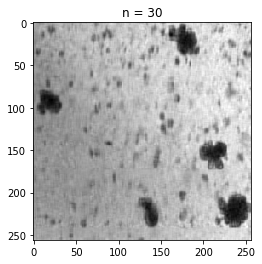

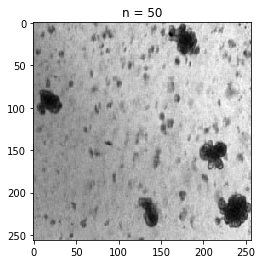

In [100]:
#Let's examine what happens if we apply the SVD to an image and try and reconstruct the image...
#Think about running all data through filtering to eliminate noise

for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

# Using SVD we can filter the data to retain organoids. Use this a step to preprocess the data? 